<a href="https://colab.research.google.com/github/vivek-varshney/Practice/blob/main/HR_DATA/HR_data_U1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit1.csv

--2020-12-02 14:51:53--  https://raw.githubusercontent.com/gauravpks/ml-repo/master/HRDS/unit1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 633626 (619K) [text/plain]
Saving to: ‘unit1.csv’

unit1.csv           100%[===================>] 618.78K  --.-KB/s    in 0.03s   

2020-12-02 14:51:54 (18.6 MB/s) - ‘unit1.csv’ saved [633626/633626]



In [ ]:
u1 = pd.read_csv('unit1.csv')
u1

,Employee ID,Data Effective Date,Employee\nStatus\n,"Career Level \n(1=lowest, 6=highest)\n",Hired Date,Hired in FY\n(Yes/No),Termination Date,Terminated\nin FY\n(Yes/No),Termination Type\n(Voluntary or Involuntary Exit),Job Start Date,Promoted\nin FY\n(Yes/No),Birth Date,Age\n(Years),Tenure\n(Years),Time in\nJob (Years),Rating,Education\n(Highest\nDegree)
0,A0001,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,21-09-1992,NaN,NaN,NaN,At Target,BA/BS
1,A0002,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,16-11-1993,NaN,NaN,NaN,At Target,BA/BS
2,A0003,31-12-2016,Active,1,14-03-2016,Yes,NaN,No,NaN,14-03-2016,NaN,26-11-1993,NaN,NaN,NaN,At Target,MA/MS
3,A0004,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,28-03-1993,NaN,NaN,NaN,At Target,BA/BS
4,A0005,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1992,NaN,NaN,NaN,At Target,BA/BS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,A6324,31-12-2016,Terminated,6,18-01-1981,No,19-01-2016,Yes,Voluntary Exit,19-01-2004,No,18-12-1960,NaN,NaN,NaN,Above Target,JD
6324,A6325,31-12-2016,Terminated,6,07-07-1980,No,25-04-2016,Yes,Voluntary Exit,13-08-2005,No,08-04-1955,NaN,NaN,NaN,Above Target,BA/BS
6325,A6326,31-12-2016,Terminated,6,21-04-1991,No,13-09-2016,Yes,Voluntary Exit,06-02-2005,No,25-02-1965,NaN,NaN,NaN,Significantly Above Target,MA/MS
6326,A6327,31-12-2016,Terminated,6,30-10-1980,No,12-07-2016,Yes,Voluntary Exit,11-01-2004,No,26-01-1958,NaN,NaN,NaN,Above Target,MBA


In [ ]:
u1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6328 entries, 0 to 6327
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Employee ID                                       6328 non-null   object 
 1   Data Effective Date                               6328 non-null   object 
 2   Employee
Status
                                  6328 non-null   object 
 3   Career Level 
(1=lowest, 6=highest)
              6328 non-null   int64  
 4   Hired Date                                        6328 non-null   object 
 5   Hired in FY
(Yes/No)                              6328 non-null   object 
 6   Termination Date                                  408 non-null    object 
 7   Terminated
in FY
(Yes/No)                         6328 non-null   object 
 8   Termination Type
(Voluntary or Involuntary Exit)  408 non-null    object 
 9   Job Start Date     

In [ ]:
u1.rename(columns={'Employee\nStatus\n':'Employee Status','Career Level \n(1=lowest, 6=highest)\n':'Career Level',
                   'Hired in FY\n(Yes/No)':'Hired in FY','Terminated\nin FY\n(Yes/No)':'Terminated',
                   'Termination Type\n(Voluntary or Involuntary Exit)':'Termination Type','Promoted\nin FY\n(Yes/No)':'Promoted',
                   'Age\n(Years)':'Age','Tenure\n(Years)':'Tenure','Time in\nJob (Years)':'Time in Job',
                   'Education\n(Highest\nDegree)':'Education'},inplace = True)
u1.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education
0,A0001,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,21-09-1992,NaN,NaN,NaN,At Target,BA/BS
1,A0002,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,16-11-1993,NaN,NaN,NaN,At Target,BA/BS
2,A0003,31-12-2016,Active,1,14-03-2016,Yes,NaN,No,NaN,14-03-2016,NaN,26-11-1993,NaN,NaN,NaN,At Target,MA/MS
3,A0004,31-12-2016,Active,1,12-09-2016,Yes,NaN,No,NaN,12-09-2016,NaN,28-03-1993,NaN,NaN,NaN,At Target,BA/BS
4,A0005,31-12-2016,Active,1,19-04-2016,Yes,NaN,No,NaN,19-04-2016,NaN,01-09-1992,NaN,NaN,NaN,At Target,BA/BS


In [ ]:
u1['Data Effective Date'] = pd.to_datetime(u1['Data Effective Date'])
u1['Hired Date'] = pd.to_datetime(u1['Hired Date'])
u1['Job Start Date'] = pd.to_datetime(u1['Job Start Date'])
u1['Birth Date'] = pd.to_datetime(u1['Birth Date'])
u1['Termination Date'] = pd.to_datetime(u1['Termination Date'])

In [ ]:
u1['Age'] = (u1['Data Effective Date'].apply(lambda x : x.year) - u1['Birth Date'].apply(lambda x : x.year))
u1.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,NaN,NaN,At Target,BA/BS
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,NaN,NaN,At Target,BA/BS
2,A0003,2016-12-31,Active,1,2016-03-14,Yes,NaT,No,NaN,2016-03-14,NaN,1993-11-26,23,NaN,NaN,At Target,MA/MS
3,A0004,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1993-03-28,23,NaN,NaN,At Target,BA/BS
4,A0005,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1992-01-09,24,NaN,NaN,At Target,BA/BS


In [ ]:
u1['Tenure'] = (u1['Data Effective Date'].apply(lambda x : x.year) - u1['Hired Date'].apply(lambda x : x.year))
u1['Time in Job'] = (u1['Data Effective Date'].apply(lambda x : x.year)-u1['Job Start Date'].apply(lambda x : x.year))
u1.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS
2,A0003,2016-12-31,Active,1,2016-03-14,Yes,NaT,No,NaN,2016-03-14,NaN,1993-11-26,23,0,0,At Target,MA/MS
3,A0004,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1993-03-28,23,0,0,At Target,BA/BS
4,A0005,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1992-01-09,24,0,0,At Target,BA/BS


In [ ]:
u1 = u1.drop([4322,702])

In [ ]:
age_cnt = u1['Age'].value_counts()
age_cnt

23    509
28    505
29    415
31    394
30    369
24    355
25    322
26    321
27    294
32    248
36    238
34    237
35    219
33    189
41    144
39    131
40    124
42    119
43    103
38    102
50     98
37     96
49     89
22     85
53     82
51     80
52     76
54     72
48     72
44     62
55     49
47     47
46     40
45     20
56     16
58      2
60      1
61      1
Name: Age, dtype: int64

In [ ]:
def agegrp(x):
  if x<=20:
    group = 'Below 20'
  elif x>=21 and x<=30:
    group = '21-30'
  elif x>=31 and x<=40:
    group = '31-40'
  elif x>=41 and x<=50:
    group = '41-50'
  elif x>=51 and x<=60:
    group = '51-60'
  elif x>=61:
    group = 'Above 61'
  return group

In [ ]:
u1['Age Group'] = u1['Age'].apply(agegrp)
u1.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30
2,A0003,2016-12-31,Active,1,2016-03-14,Yes,NaT,No,NaN,2016-03-14,NaN,1993-11-26,23,0,0,At Target,MA/MS,21-30
3,A0004,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1993-03-28,23,0,0,At Target,BA/BS,21-30
4,A0005,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1992-01-09,24,0,0,At Target,BA/BS,21-30


In [ ]:
agegrp_cnt = np.round(u1['Age Group'].value_counts(normalize = True)*100,2)
agegrp_cnt

21-30       50.19
31-40       31.27
41-50       12.55
51-60        5.98
Above 61     0.02
Name: Age Group, dtype: float64

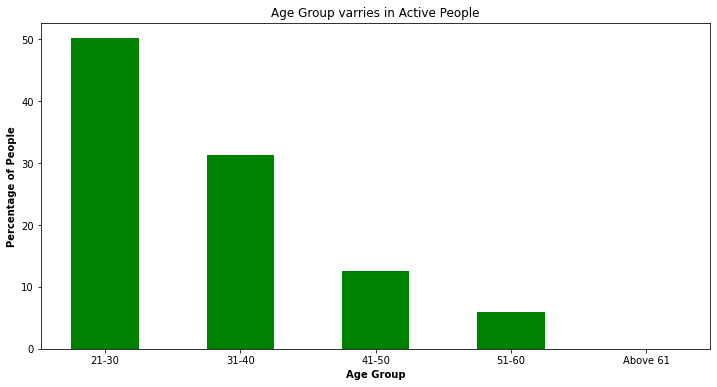

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(agegrp_cnt.keys().values,agegrp_cnt,color = 'green',width = 0.5)
plt.xlabel('Age Group',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Age Group varries in Active People');

In [ ]:
actv_count = u1[u1['Employee Status']=='Active']
actv_count

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30
2,A0003,2016-12-31,Active,1,2016-03-14,Yes,NaT,No,NaN,2016-03-14,NaN,1993-11-26,23,0,0,At Target,MA/MS,21-30
3,A0004,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1993-03-28,23,0,0,At Target,BA/BS,21-30
4,A0005,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1992-01-09,24,0,0,At Target,BA/BS,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915,A5916,2016-12-31,Active,6,1986-03-14,No,NaT,No,NaN,2005-11-25,No,1964-06-13,52,30,11,Above Target,PhD,51-60
5916,A5917,2016-12-31,Active,6,1988-12-09,No,NaT,No,NaN,2005-05-26,No,1964-08-14,52,28,11,At Target,MBA,51-60
5917,A5918,2016-12-31,Active,6,1993-11-25,No,NaT,No,NaN,2006-09-13,No,1963-02-23,53,23,10,Above Target,PhD,51-60
5918,A5919,2016-12-31,Active,6,1991-02-07,No,NaT,No,NaN,2007-06-02,No,1966-09-07,50,25,9,Above Target,PhD,41-50


In [ ]:
termin_count = u1[u1['Employee Status']=='Terminated']
termin_count

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
5920,A5921,2016-12-31,Terminated,1,2015-02-11,Yes,2016-09-26,Yes,Voluntary Exit,2015-02-11,NaN,1992-07-06,24,1,1,At Target,BA/BS,21-30
5921,A5922,2016-12-31,Terminated,1,2016-04-08,Yes,2016-10-16,Yes,Voluntary Exit,2016-04-08,NaN,1994-05-31,22,0,0,At Target,MA/MS,21-30
5922,A5923,2016-12-31,Terminated,1,2016-06-14,Yes,2016-08-26,Yes,Voluntary Exit,2016-06-14,NaN,1990-05-10,26,0,0,At Target,BA/BS,21-30
5923,A5924,2016-12-31,Terminated,1,2016-07-08,Yes,2016-11-25,Yes,Voluntary Exit,2016-07-08,NaN,1993-02-14,23,0,0,At Target,BA/BS,21-30
5924,A5925,2016-12-31,Terminated,1,2015-06-23,Yes,2016-01-28,Yes,Voluntary Exit,2015-06-23,NaN,1993-09-04,23,1,1,At Target,BA/BS,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,A6324,2016-12-31,Terminated,6,1981-01-18,No,2016-01-19,Yes,Voluntary Exit,2004-01-19,No,1960-12-18,56,35,12,Above Target,JD,51-60
6324,A6325,2016-12-31,Terminated,6,1980-07-07,No,2016-04-25,Yes,Voluntary Exit,2005-08-13,No,1955-08-04,61,36,11,Above Target,BA/BS,Above 61
6325,A6326,2016-12-31,Terminated,6,1991-04-21,No,2016-09-13,Yes,Voluntary Exit,2005-06-02,No,1965-02-25,51,25,11,Significantly Above Target,MA/MS,51-60
6326,A6327,2016-12-31,Terminated,6,1980-10-30,No,2016-12-07,Yes,Voluntary Exit,2004-11-01,No,1958-01-26,58,36,12,Above Target,MBA,51-60


Active People

---



In [ ]:
crlvl_act_cnt = np.round(actv_count['Career Level'].value_counts(normalize = True)*100,1)[[1,2,3,4,5,6]]
crlvl_act_cnt

1    15.2
2    18.6
3    19.6
4    18.8
5    15.2
6    12.7
Name: Career Level, dtype: float64

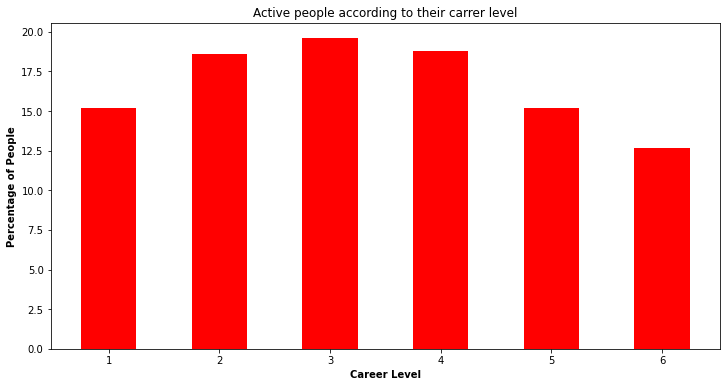

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(crlvl_act_cnt.keys().values,crlvl_act_cnt,color = 'red',width = 0.5)
plt.xlabel('Career Level',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Active people according to their carrer level');

In [ ]:
age_act_cnt = actv_count['Age'].value_counts()
age_act_cnt

23    468
28    468
29    375
31    365
30    337
24    298
26    293
25    289
27    267
32    235
36    232
34    226
35    211
33    182
41    141
39    130
40    121
42    116
38    100
43     99
50     98
37     92
49     89
53     81
51     78
52     76
22     76
48     72
54     72
44     62
55     49
47     47
46     40
45     18
56     15
Name: Age, dtype: int64

In [ ]:
agegrp_act_cnt = np.round(actv_count['Age Group'].value_counts(normalize = True)*100,2)
agegrp_act_cnt

21-30    48.51
31-40    32.00
41-50    13.21
51-60     6.27
Name: Age Group, dtype: float64

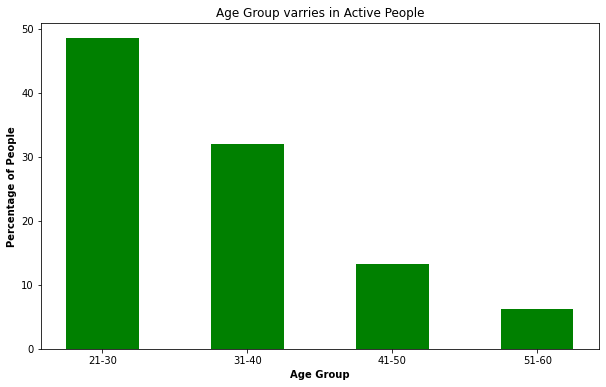

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(agegrp_act_cnt.keys().values,agegrp_act_cnt,color = 'green',width = 0.5)
plt.xlabel('Age Group',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Age Group varries in Active People');

In [ ]:
edu_act_cnt = np.round(actv_count['Education'].value_counts(normalize = True)*100,2)
edu_act_cnt

BA/BS    57.42
MA/MS    20.41
MBA      19.47
PhD       1.54
JD        1.17
Name: Education, dtype: float64

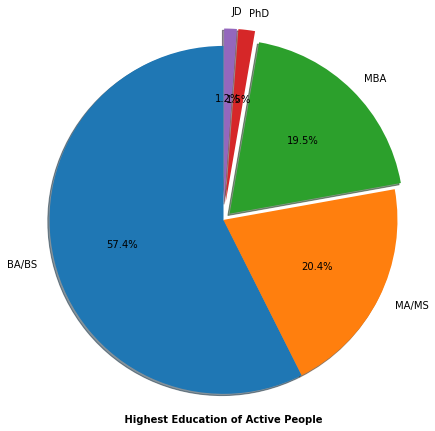

In [ ]:
plt.pie(edu_act_cnt.values,radius = 2,labels=edu_act_cnt.keys().values,explode=(0,0,0.1,0.2,0.2),shadow=True,
        autopct='%.1f%%',startangle = 90)
plt.xlabel('\n\n\n\n\n\n\n Highest Education of Active People ',fontweight = 'bold');

In [ ]:
rtng_act_cnt = np.round(actv_count['Rating'].value_counts(normalize = True)*100,1)
rtng_act_cnt

Above Target                  47.8
At Target                     41.3
Below Target                   5.6
Significantly Above Target     5.2
Significantly Below Target     0.1
Name: Rating, dtype: float64

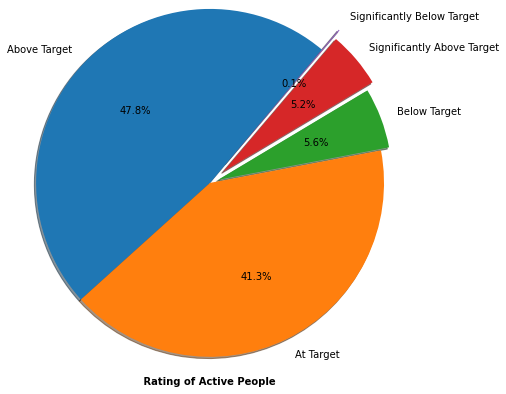

In [ ]:
plt.pie(rtng_act_cnt.values,radius = 2,labels=rtng_act_cnt.keys().values,explode=(0,0,0.1,0.2,0.3),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n Rating of Active People ',fontweight = 'bold');

In [ ]:
prmt_cnt = actv_count['Promoted'].value_counts()
prmt_cnt

No     4054
Yes     965
Name: Promoted, dtype: int64

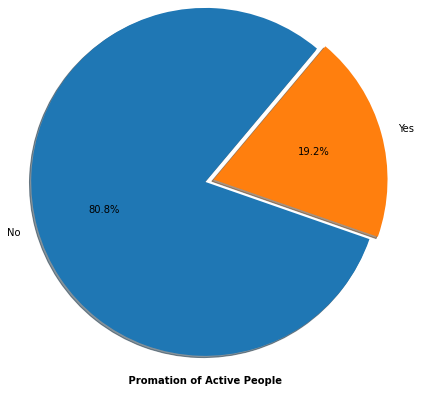

In [ ]:
plt.pie(prmt_cnt.values,radius = 2,labels=prmt_cnt.keys().values,explode=(0,0.1),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n Promation of Active People ',fontweight = 'bold');

Terminted people

---



In [ ]:
crlvl_ter_cnt = np.round(termin_count['Career Level'].value_counts(normalize = True)*100,1)[[1,2,3,4,5,6]]
crlvl_ter_cnt

1    33.1
2    27.0
3    22.8
4    10.8
5     4.4
6     2.0
Name: Career Level, dtype: float64

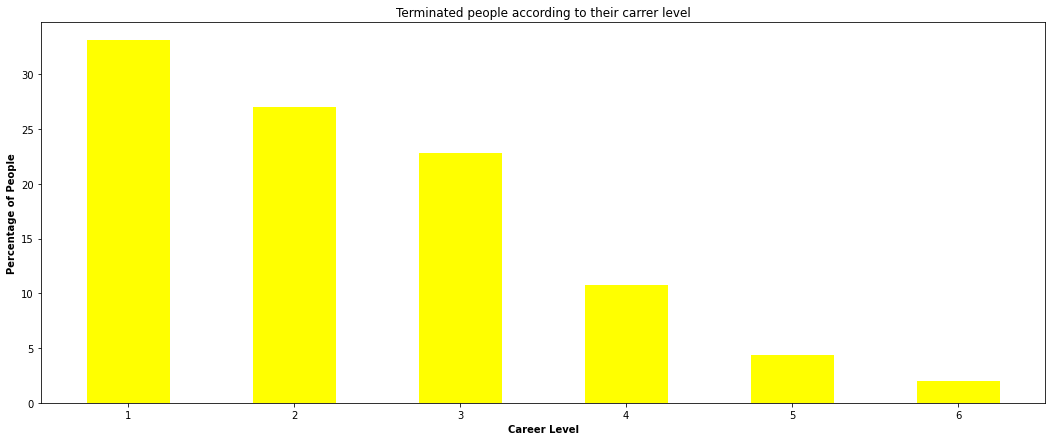

In [ ]:
plt.figure(figsize=(18,7))
plt.bar(crlvl_ter_cnt.keys().values,crlvl_ter_cnt,color = 'yellow',width = 0.5)
plt.xlabel('Career Level',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Terminated people according to their carrer level');

In [ ]:
agegrp_ter_cnt = np.round(termin_count['Age Group'].value_counts(normalize = True)*100,2)
agegrp_ter_cnt

21-30       74.51
31-40       20.59
41-50        2.94
51-60        1.72
Above 61     0.25
Name: Age Group, dtype: float64

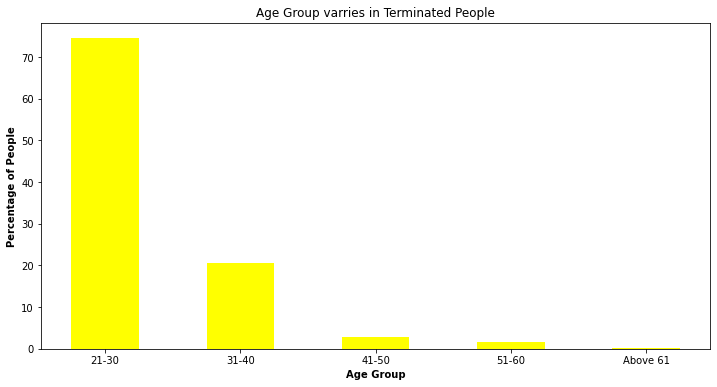

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(agegrp_ter_cnt.keys().values,agegrp_ter_cnt,color = 'yellow',width = 0.5)
plt.xlabel('Age Group', fontweight = 'bold')
plt.ylabel('Percentage of People', fontweight = 'bold')
plt.title('Age Group varries in Terminated People');

In [ ]:
edu_ter_cnt = np.round(termin_count['Education'].value_counts(normalize = True)*100,2)
edu_ter_cnt

BA/BS    70.83
MA/MS    15.69
MBA      12.50
PhD       0.74
JD        0.25
Name: Education, dtype: float64

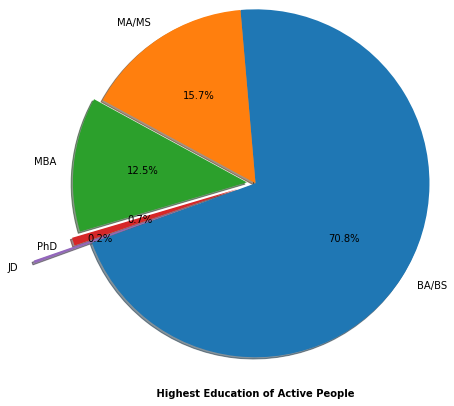

In [ ]:
plt.pie(edu_ter_cnt.values,radius = 2,labels=edu_ter_cnt.keys().values,explode=(0,0,0.1,0.2,0.7),shadow=True,
        autopct='%.1f%%',startangle = 200)
plt.xlabel('\n\n\n\n\n\n\n\n Highest Education of Active People ',fontweight = 'bold');

In [ ]:
rtng_ter_cnt = np.round(termin_count['Rating'].value_counts(normalize = True)*100,1)
rtng_ter_cnt

Above Target                  43.4
At Target                     32.4
Significantly Above Target    12.3
Below Target                  10.0
Significantly Below Target     2.0
Name: Rating, dtype: float64

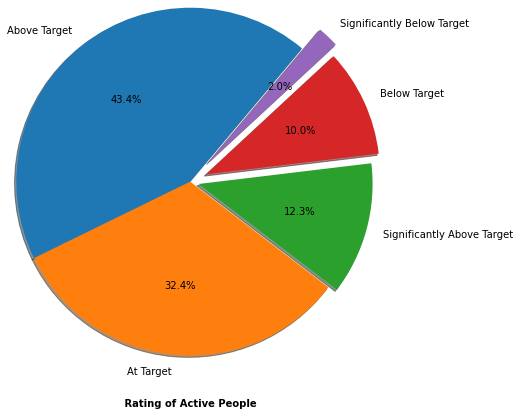

In [ ]:
plt.pie(rtng_ter_cnt.values,radius = 2,labels=rtng_ter_cnt.keys().values,explode=(0,0,0.1,0.2,0.3),shadow=True,
        autopct='%.1f%%',startangle = 50)
plt.xlabel('\n\n\n\n\n\n\n\n\n Rating of Active People ',fontweight = 'bold');

In [ ]:
tertyp_cnt = termin_count['Termination Type'].value_counts()
tertyp_cnt

Voluntary Exit      323
Involuntary Exit     85
Name: Termination Type, dtype: int64

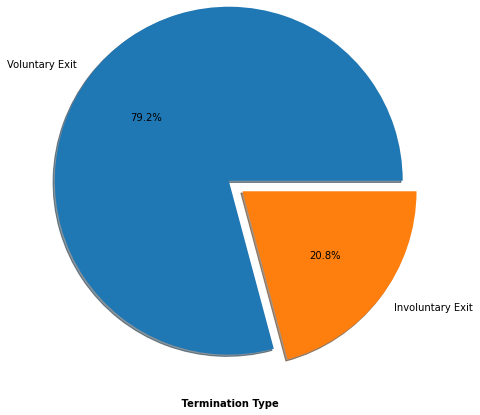

In [ ]:
plt.pie(tertyp_cnt.values,radius = 2,labels=tertyp_cnt.keys().values,explode=(0,0.2),shadow=True,
        autopct='%.1f%%')
plt.xlabel('\n\n\n\n\n\n\n\n\n Termination Type',fontweight = 'bold');

In [ ]:
u1.head()

,Employee ID,Data Effective Date,Employee Status,Career Level,Hired Date,Hired in FY,Termination Date,Terminated,Termination Type,Job Start Date,Promoted,Birth Date,Age,Tenure,Time in Job,Rating,Education,Age Group
0,A0001,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1992-09-21,24,0,0,At Target,BA/BS,21-30
1,A0002,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1993-11-16,23,0,0,At Target,BA/BS,21-30
2,A0003,2016-12-31,Active,1,2016-03-14,Yes,NaT,No,NaN,2016-03-14,NaN,1993-11-26,23,0,0,At Target,MA/MS,21-30
3,A0004,2016-12-31,Active,1,2016-12-09,Yes,NaT,No,NaN,2016-12-09,NaN,1993-03-28,23,0,0,At Target,BA/BS,21-30
4,A0005,2016-12-31,Active,1,2016-04-19,Yes,NaT,No,NaN,2016-04-19,NaN,1992-01-09,24,0,0,At Target,BA/BS,21-30


Mix data

---



In [ ]:
u1[['Tenure','Time in Job']]

,Tenure,Time in Job
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6323,35,12
6324,36,11
6325,25,11
6326,36,12


In [ ]:
prcnt = lambda x : np.round(x/x.sum() * 100)
tm_dif_cnt = u1.groupby(['Tenure','Time in Job'])['Tenure'].count().unstack().apply(prcnt,axis = 1)
tm_dif_cnt

Time in Job,0,1,2,3,4,5,6,7,8,9,10,11,12
Tenure,,,,,,,,,,,,,
0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,5.0,4.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43.0,20.0,23.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,42.0,22.0,26.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,34.0,11.0,13.0,24.0,15.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24.0,1.0,9.0,27.0,30.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,22.0,NaN,7.0,25.0,31.0,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
prcnt = lambda x: np.round(x/x.sum() * 100)
agegrp_lvl_cnt  = u1.groupby(['Age Group','Career Level'])['Age Group'].count().unstack().apply(prcnt,axis = 1)
agegrp_lvl_cnt

Career Level,1,2,3,4,5,6
Age Group,,,,,,
21-30,33.0,38.0,28.0,1.0,NaN,NaN
31-40,NaN,NaN,18.0,56.0,25.0,NaN
41-50,NaN,NaN,NaN,NaN,52.0,48.0
51-60,NaN,NaN,NaN,NaN,NaN,100.0
Above 61,NaN,NaN,NaN,NaN,NaN,100.0


In [ ]:
agegrp_lvl_cnt[1].keys().values

array(['21-30', '31-40', '41-50', '51-60', 'Above 61'], dtype=object)

In [ ]:
agegrp_lvl_cnt.to_numpy()[4]

array([ nan,  nan,  nan,  nan,  nan, 100.])

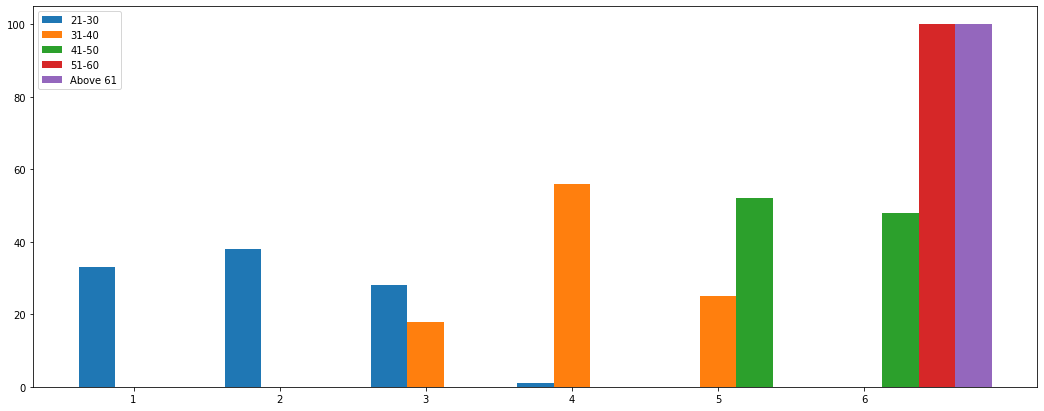

In [ ]:
fig  = plt.figure(figsize=(18,7))
barWidth  = 0.25

bar1 = agegrp_lvl_cnt.to_numpy()[0]
bar2 = agegrp_lvl_cnt.to_numpy()[1]
bar3 = agegrp_lvl_cnt.to_numpy()[2]
bar4 = agegrp_lvl_cnt.to_numpy()[3]
bar5 = agegrp_lvl_cnt.to_numpy()[4]


r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


plt.bar(r1,bar1, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[0])
plt.bar(r2,bar2, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[1])
plt.bar(r3,bar3, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[2])
plt.bar(r4,bar4, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[3])
plt.bar(r5,bar5, width=barWidth, label=agegrp_lvl_cnt[1].keys().values[4])

plt.xticks([r + barWidth for r in range(len(bar1))],agegrp_lvl_cnt.keys().values)

plt.legend()
plt.show()

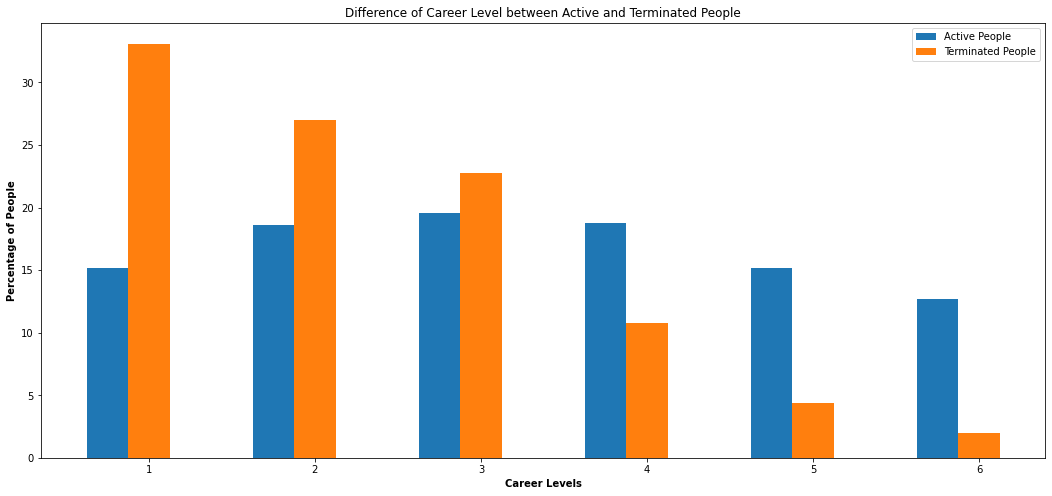

In [ ]:
plt.figure(figsize=(18,8))
barWidth = 0.25

barr1 = crlvl_act_cnt.to_numpy()
barr2 = crlvl_ter_cnt.to_numpy()

rr1 = np.arange(len(bar1))
rr2 = [x + barWidth for x in rr1]

plt.bar(rr1,barr1,width=barWidth, label = 'Active People')
plt.bar(rr2,barr2,width=barWidth, label = 'Terminated People')

plt.xlabel('Career Levels',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Difference of Career Level between Active and Terminated People')
plt.xticks([r + barWidth for r in range(len(barr1))], crlvl_act_cnt.keys().values)

plt.legend()
plt.show()

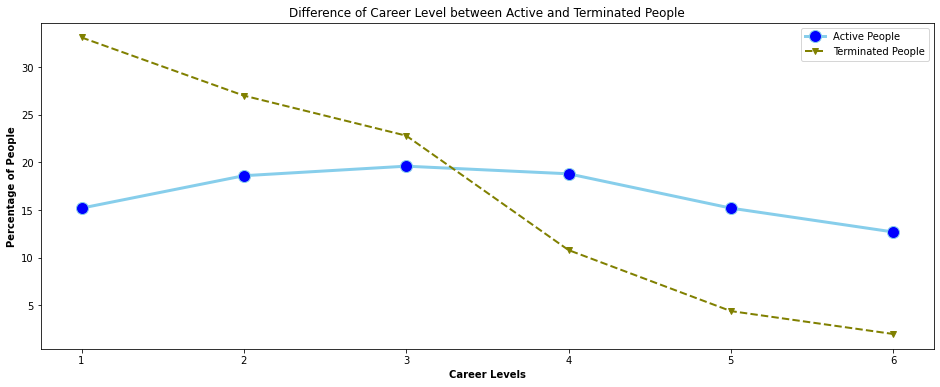

In [ ]:
fig = plt.figure(figsize = (16, 6))

plt.plot( crlvl_act_cnt.keys().values, crlvl_act_cnt.values, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=3,label = 'Active People')
plt.plot( crlvl_ter_cnt.keys().values, crlvl_ter_cnt.values, marker='v', color='olive' , linewidth=2, linestyle='dashed',label = 'Terminated People')

plt.xlabel('Career Levels',fontweight = 'bold')
plt.ylabel('Percentage of People',fontweight = 'bold')
plt.title('Difference of Career Level between Active and Terminated People')

plt.xticks(crlvl_ter_cnt.keys().values)

plt.legend();